# Seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set()
%matplotlib inline

*Seaborn* aims to make visualizations a central part of data exploration.
It is "dataset-oriented" - here is an example of what that means:

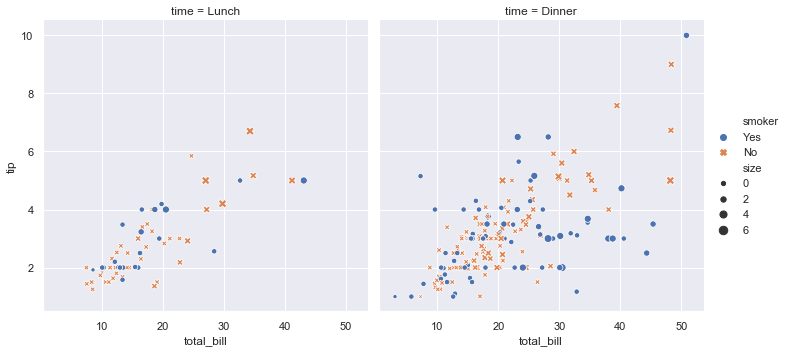

In [2]:
tips = sns.load_dataset('tips')
sns.relplot(x='total_bill', y='tip', col='time',
            hue='smoker', style='smoker', size='size',
            data=tips)
plt.show()

## API abstraction across visualizations

There is no *best* way to visualize data, so Seaborn maintains a consisten API to make creating multiple visualizations easy.

The function [`relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html) is designed to visualize many *rel*ationships between features.
This function has a `kind` parameter for changing the way the data is plotted.
The default is `'scatter'`, though changing it to `line` produces a line plot.

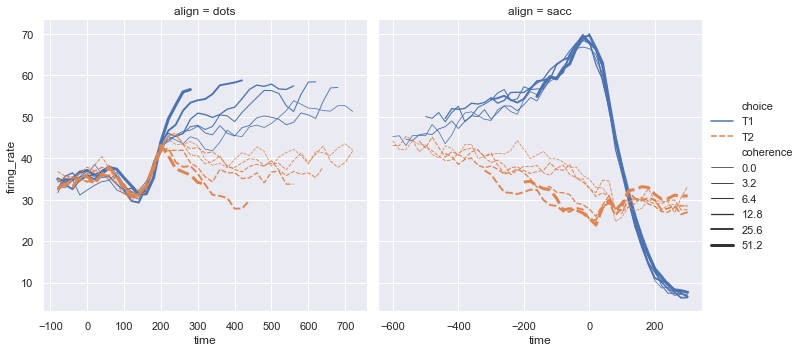

In [3]:
dots = sns.load_dataset('dots')
sns.relplot(x='time', y='firing_rate',
            hue='choice', style='choice', size='coherence',
            facet_kws={'sharex': False},
            kind='line', legend='full', col='align',
            data=dots)
plt.show()

## Statistical estimation and error bars

Many Seaborn functions can automatically perform statistical estimation on the data.

Below, Seaborn used boostrapping to compute confidence intervals and drew error bars.

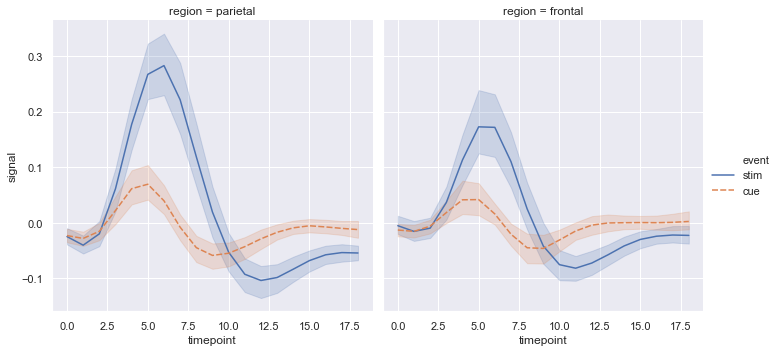

In [4]:
fmri = sns.load_dataset('fmri')
sns.relplot(x='timepoint', y='signal', col='region',
            hue='event', style='event',
            kind='line', data=fmri)
plt.show()

The `lmplot()` function adds a linear regression model to a scatter plot.

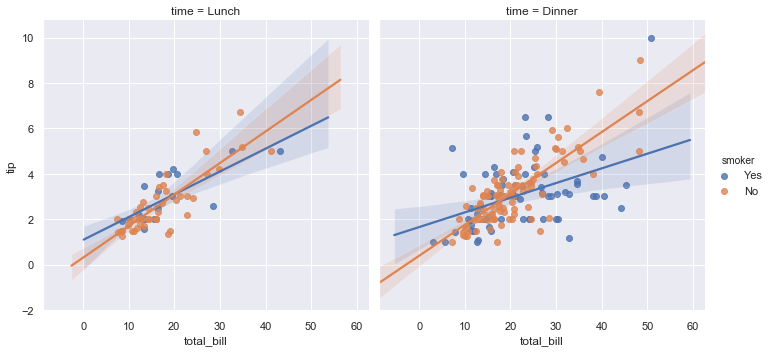

In [5]:
sns.lmplot(x='total_bill', y='tip', col='time', hue='smoker',
           data=tips)
plt.show()

## Specialized categorical plots

The `catplot()` functions is the analog of `relplot()` for plotting categorical data.
Thus, by just changing the `kind` parameter, many different plotting types can be used.

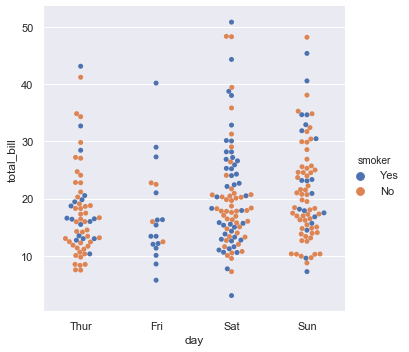

In [6]:
sns.catplot(x='day', y='total_bill', hue='smoker',
            kind='swarm', data=tips)
plt.show()

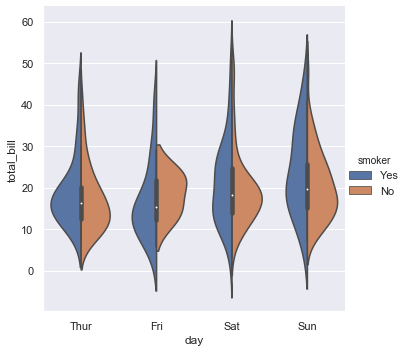

In [7]:
sns.catplot(x='day', y='total_bill', hue='smoker',
            kind='violin', split=True, data=tips)
plt.show()

## Visualizing dataset structure

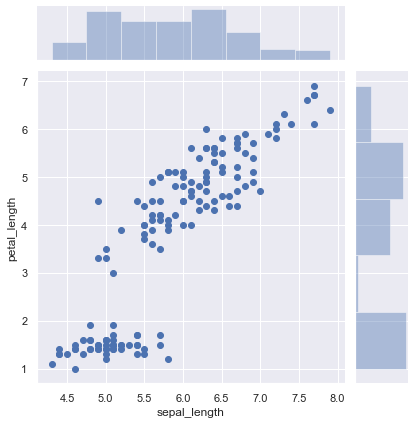

In [8]:
iris = sns.load_dataset('iris')
sns.jointplot(x='sepal_length', y='petal_length', data=iris)
plt.show()

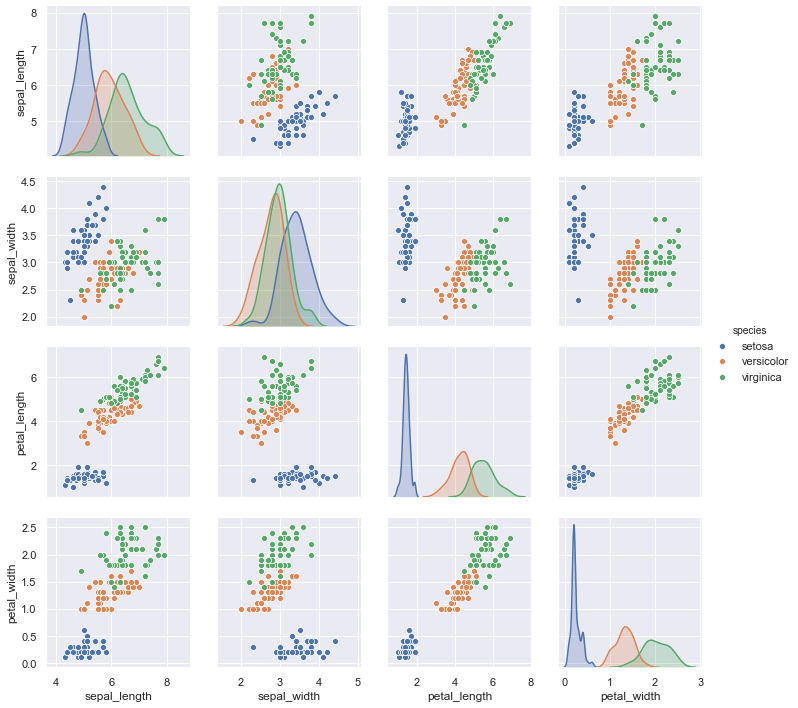

In [9]:
sns.pairplot(hue='species', data=iris)
plt.show()

## Specific plot types

### [Cluster map](https://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn.clustermap)

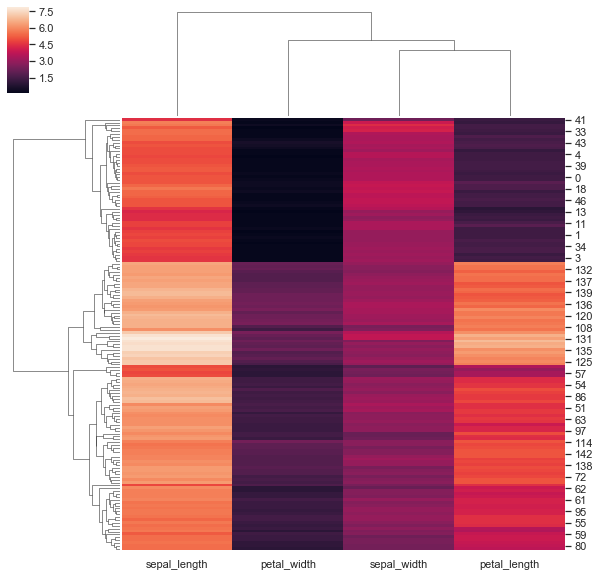

In [10]:
iris = sns.load_dataset('iris')
species = iris.pop('species')
sns.clustermap(iris)
plt.show()

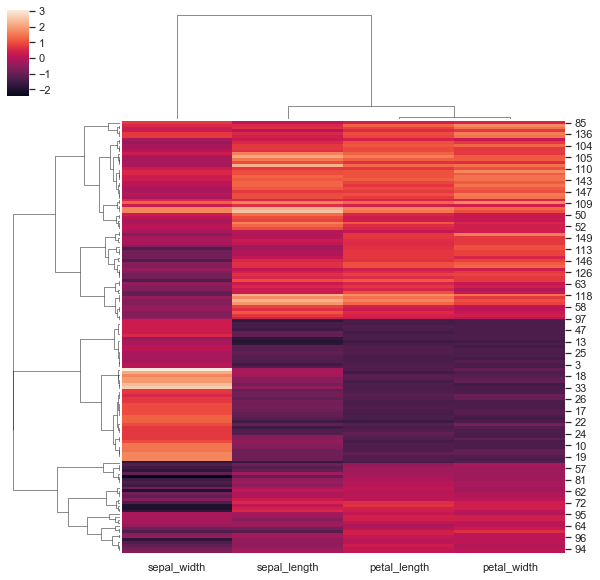

In [11]:
iris = sns.load_dataset('iris')
species = iris.pop('species')
sns.clustermap(method='complete', metric='cosine', 
               z_score=1, data=iris)
plt.show()

{'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}


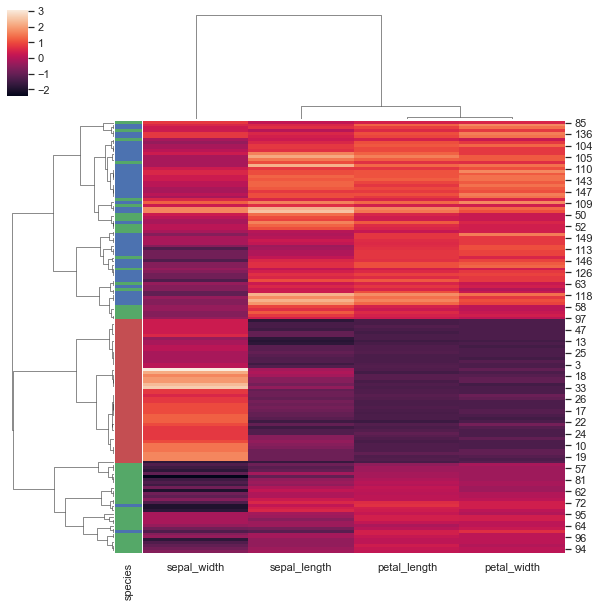

In [12]:
iris = sns.load_dataset('iris')
species = iris.pop('species')

# Map species to a color.
lut = dict(zip(sorted(species.unique()), 'rgb'))
row_colors = species.map(lut)
print(lut)

grid = sns.clustermap(method='complete', metric='cosine', 
               z_score=1, row_colors=row_colors,
               data=iris)